### EN3160 Assignment 3 on Neural Networks - Kodithuwakku J.N (210294N)

# Question 1
## Part (a)

Epoch 1/20: 100%|██████████| 1000/1000 [00:14<00:00, 69.82it/s, loss=0.977]


Iteration 1, average loss = 0.9769763523936271


Epoch 2/20: 100%|██████████| 1000/1000 [00:14<00:00, 68.34it/s, loss=0.95] 


Iteration 2, average loss = 0.9498650777935982


Epoch 3/20: 100%|██████████| 1000/1000 [00:12<00:00, 79.59it/s, loss=0.936]


Iteration 3, average loss = 0.9361192533969879


Epoch 4/20: 100%|██████████| 1000/1000 [00:17<00:00, 57.38it/s, loss=0.928]


Iteration 4, average loss = 0.9275614694952965


Epoch 5/20: 100%|██████████| 1000/1000 [00:13<00:00, 72.93it/s, loss=0.922]


Iteration 5, average loss = 0.921623415350914


Epoch 6/20: 100%|██████████| 1000/1000 [00:13<00:00, 73.60it/s, loss=0.917]


Iteration 6, average loss = 0.9172190102338791


Epoch 7/20: 100%|██████████| 1000/1000 [00:13<00:00, 72.42it/s, loss=0.914]


Iteration 7, average loss = 0.9138052223324775


Epoch 8/20: 100%|██████████| 1000/1000 [00:11<00:00, 85.84it/s, loss=0.911]


Iteration 8, average loss = 0.9110771568417549


Epoch 9/20: 100%|██████████| 1000/1000 [00:12<00:00, 81.66it/s, loss=0.909]


Iteration 9, average loss = 0.9088478618264199


Epoch 10/20: 100%|██████████| 1000/1000 [00:13<00:00, 72.64it/s, loss=0.907]


Iteration 10, average loss = 0.9069943491816521


Epoch 11/20: 100%|██████████| 1000/1000 [00:17<00:00, 57.48it/s, loss=0.905]


Iteration 11, average loss = 0.9054329832196235


Epoch 12/20: 100%|██████████| 1000/1000 [00:16<00:00, 62.26it/s, loss=0.904]


Iteration 12, average loss = 0.9041053671836853


Epoch 13/20: 100%|██████████| 1000/1000 [00:15<00:00, 62.68it/s, loss=0.903]


Iteration 13, average loss = 0.9029663359522819


Epoch 14/20: 100%|██████████| 1000/1000 [00:16<00:00, 61.39it/s, loss=0.902]


Iteration 14, average loss = 0.9019828267097473


Epoch 15/20: 100%|██████████| 1000/1000 [00:18<00:00, 53.45it/s, loss=0.901]


Iteration 15, average loss = 0.9011285715699195


Epoch 16/20: 100%|██████████| 1000/1000 [00:16<00:00, 61.78it/s, loss=0.9] 


Iteration 16, average loss = 0.9003834556937218


Epoch 17/20: 100%|██████████| 1000/1000 [00:16<00:00, 60.19it/s, loss=0.9] 


Iteration 17, average loss = 0.89973063737154


Epoch 18/20: 100%|██████████| 1000/1000 [00:14<00:00, 66.67it/s, loss=0.899]


Iteration 18, average loss = 0.8991570203900338


Epoch 19/20: 100%|██████████| 1000/1000 [00:14<00:00, 71.08it/s, loss=0.899]


Iteration 19, average loss = 0.8986515093445778


Epoch 20/20: 100%|██████████| 1000/1000 [00:16<00:00, 60.70it/s, loss=0.898]


Iteration 20, average loss = 0.8982048028707504


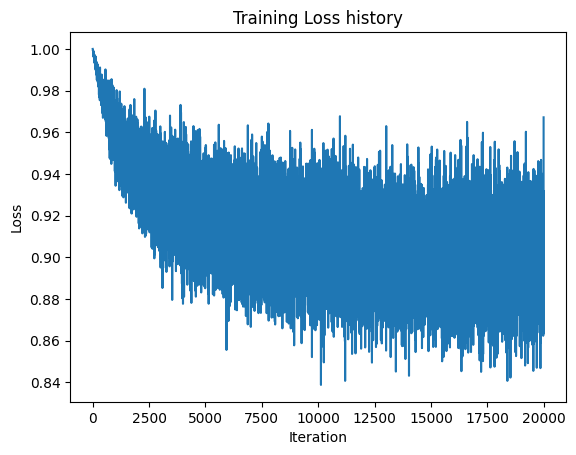

Training accuracy = 32.226
Test accuracy = 32.43


In [3]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

# 1. Dataloading
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define network parameters

Din = 3*32*32 #Input size (flattened image)
K = 10
std = 1e-5

#Initialize weights and biases

w = torch.randn(Din, K, dtype=torch.float32)*std
b = torch.zeros(K)

#Hyperparameters
iterations = 20
learning_rate = 2e-6
learning_rate_decay = 0.9
reg = 0
loss_history = []

# 3. Training
for t in range(iterations):
    running_loss = 0.0
    # Add tqdm progress bar
    with tqdm(enumerate(trainloader, 0), total=len(trainloader), desc=f"Epoch {t+1}/{iterations}") as pbar:
        for i, data in pbar:
            inputs, labels = data
            Ntr = inputs.shape[0]
            x_train = inputs.view(Ntr, -1)
            y_train_onehot = nn.functional.one_hot(labels, K).float()

            # Forward pass
            y_pred = x_train.mm(w) + b

            # Compute loss
            loss = (1/Ntr)*torch.sum((y_pred - y_train_onehot)**2) + reg*(torch.sum(w**2) + torch.sum(b**2))
            loss_history.append(loss.item())
            running_loss += loss.item()

            # Backpropagation
            dy_pred = 2.0/Ntr * (y_pred - y_train_onehot)
            dw = x_train.t().mm(dy_pred) + reg * w
            db = dy_pred.sum(dim=0) + reg * b

            # Update weights
            w -= learning_rate * dw
            b -= learning_rate * db

            # Update the progress bar description with the current loss
            pbar.set_postfix(loss=running_loss/(i+1))

    # Decay learning rate
    learning_rate *= learning_rate_decay

    # Print loss for every epoch
    print(f"Iteration {t+1}, average loss = {running_loss/len(trainloader)}")
# 4. Plot loss
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss history')
plt.show()

# 5. Calculate Accuracy on training set
correct_train = 0
total_train = 0

with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        y_pred = x_train.mm(w) + b
        _, predicted = torch.max(y_pred, 1)
        _, actual = torch.max(y_train_onehot, 1)
        total_train += labels.size(0)
        correct_train += (predicted == actual).sum().item()

train_accuracy = 100 * correct_train / total_train
print(f"Training accuracy = {train_accuracy}")

# 6. Calculate Accuracy on test set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn.functional.one_hot(labels, K).float()

        y_pred = x_test.mm(w) + b
        _, predicted = torch.max(y_pred, 1)
        _, actual = torch.max(y_test_onehot, 1)
        total_test += labels.size(0)
        correct_test += (predicted == actual).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f"Test accuracy = {test_accuracy}")
    

##### First, the given code was run, and the results above show that the accuracy was a bit low, while the loss was moderately converging. Next, a hidden layer with 100 nodes and a sigmoid activation function was added with the given learning rate. However, the loss didn’t converge to a smaller value, so a higher standard deviation for the initialized weights was used, which also caused a rise in the loss.

Epoch 1/20: 100%|██████████| 1000/1000 [00:11<00:00, 86.63it/s, loss=0.99] 


Iteration 1, average loss = 0.9903322434425355


Epoch 2/20: 100%|██████████| 1000/1000 [00:11<00:00, 85.83it/s, loss=0.974]


Iteration 2, average loss = 0.9741087635159492


Epoch 3/20: 100%|██████████| 1000/1000 [00:12<00:00, 82.72it/s, loss=0.962]


Iteration 3, average loss = 0.9620163740515709


Epoch 4/20: 100%|██████████| 1000/1000 [00:12<00:00, 81.39it/s, loss=0.953]


Iteration 4, average loss = 0.9528311378359795


Epoch 5/20: 100%|██████████| 1000/1000 [00:11<00:00, 84.68it/s, loss=0.946]


Iteration 5, average loss = 0.9457344248890877


Epoch 6/20: 100%|██████████| 1000/1000 [00:11<00:00, 85.14it/s, loss=0.94]


Iteration 6, average loss = 0.9401668083071709


Epoch 7/20: 100%|██████████| 1000/1000 [00:12<00:00, 82.54it/s, loss=0.936]


Iteration 7, average loss = 0.9357383375763894


Epoch 8/20: 100%|██████████| 1000/1000 [00:12<00:00, 82.70it/s, loss=0.932]


Iteration 8, average loss = 0.9321720196604729


Epoch 9/20: 100%|██████████| 1000/1000 [00:11<00:00, 84.92it/s, loss=0.929]


Iteration 9, average loss = 0.9292679197788238


Epoch 10/20: 100%|██████████| 1000/1000 [00:11<00:00, 85.43it/s, loss=0.927]


Iteration 10, average loss = 0.9268792045116424


Epoch 11/20: 100%|██████████| 1000/1000 [00:11<00:00, 85.37it/s, loss=0.925]


Iteration 11, average loss = 0.9248966419100761


Epoch 12/20: 100%|██████████| 1000/1000 [00:11<00:00, 83.62it/s, loss=0.923]


Iteration 12, average loss = 0.9232377617359161


Epoch 13/20: 100%|██████████| 1000/1000 [00:11<00:00, 84.45it/s, loss=0.922]


Iteration 13, average loss = 0.9218395282030105


Epoch 14/20: 100%|██████████| 1000/1000 [00:12<00:00, 82.97it/s, loss=0.921]


Iteration 14, average loss = 0.9206532508134841


Epoch 15/20: 100%|██████████| 1000/1000 [00:11<00:00, 84.77it/s, loss=0.92]


Iteration 15, average loss = 0.9196408605575561


Epoch 16/20: 100%|██████████| 1000/1000 [00:11<00:00, 85.28it/s, loss=0.919]


Iteration 16, average loss = 0.9187722193002701


Epoch 17/20: 100%|██████████| 1000/1000 [00:11<00:00, 84.83it/s, loss=0.918]


Iteration 17, average loss = 0.918023402094841


Epoch 18/20: 100%|██████████| 1000/1000 [00:12<00:00, 80.87it/s, loss=0.917]


Iteration 18, average loss = 0.9173750444054604


Epoch 19/20: 100%|██████████| 1000/1000 [00:13<00:00, 72.72it/s, loss=0.917]


Iteration 19, average loss = 0.9168115292787552


Epoch 20/20: 100%|██████████| 1000/1000 [00:13<00:00, 75.67it/s, loss=0.916]

Iteration 20, average loss = 0.9163199844360351


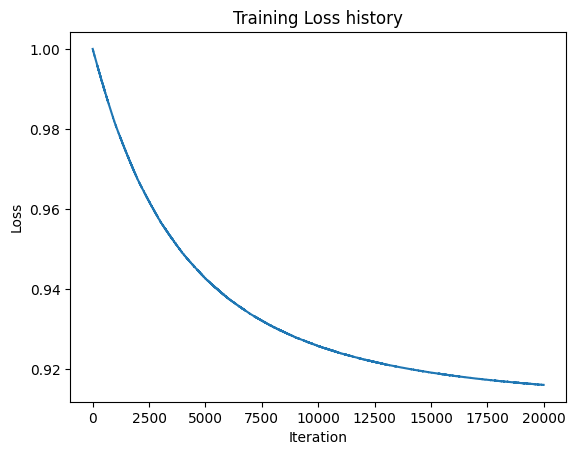

Training accuracy = 10.0
Test accuracy = 10.0


In [ ]:
w1 = torch.randn(Din, hidden_size, dtype=torch.float32)*std
b1 = torch.zeros(hidden_size)
w2 = torch.randn(hidden_size, K, dtype=torch.float32)*std
b2 = torch.zeros(K)

#Hyperparameters
iterations = 20
learning_rate = 2e-6
learning_rate_decay = 0.9
reg = 0
loss_history = []

# 3. Training
for t in range(iterations):
    running_loss = 0.0
    # Add tqdm progress bar
    with tqdm(enumerate(trainloader, 0), total=len(trainloader), desc=f"Epoch {t+1}/{iterations}") as pbar:
        for i, data in pbar:
            inputs, labels = data
            Ntr = inputs.shape[0]
            x_train = inputs.view(Ntr, -1)
            y_train_onehot = nn.functional.one_hot(labels, K).float()

            # Forward pass
            hidden = torch.sigmoid(x_train.mm(w1) + b1)
            y_pred = hidden.mm(w2)+ b2
            

            # Compute loss
            loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))

            loss_history.append(loss.item())
            running_loss += loss.item()

            # Backpropagation
            dy_pred = 2 / Ntr * (y_pred - y_train_onehot)
            dhidden = dy_pred.mm(w2.t()) * hidden * (1 - hidden)
            dw2 = hidden.t().mm(dy_pred) + reg * w2
            db2 = dy_pred.sum(dim=0)
            dw1 = x_train.t().mm(dhidden) + reg * w1
            db1 = dhidden.sum(dim=0)

            # Update weights

            w1 -= learning_rate * dw1
            b1 -= learning_rate * db1
            w2 -= learning_rate * dw2
            b2 -= learning_rate * db2

Epoch 1/20: 100%|██████████| 1000/1000 [00:10<00:00, 96.41it/s, loss=0.878]


Iteration 0, average loss = 0.8783084048032761


Epoch 2/20: 100%|██████████| 1000/1000 [00:10<00:00, 95.06it/s, loss=0.84] 


Iteration 1, average loss = 0.8404183471202851


Epoch 3/20: 100%|██████████| 1000/1000 [00:10<00:00, 92.94it/s, loss=0.827]


Iteration 2, average loss = 0.8266718888282776


Epoch 4/20: 100%|██████████| 1000/1000 [00:11<00:00, 87.00it/s, loss=0.817]


Iteration 3, average loss = 0.8168673430085183


Epoch 5/20: 100%|██████████| 1000/1000 [00:11<00:00, 84.74it/s, loss=0.81]


Iteration 4, average loss = 0.8101041377186775


Epoch 6/20: 100%|██████████| 1000/1000 [00:11<00:00, 84.51it/s, loss=0.805]


Iteration 5, average loss = 0.8045258870124817


Epoch 7/20: 100%|██████████| 1000/1000 [00:12<00:00, 83.15it/s, loss=0.8] 


Iteration 6, average loss = 0.7999206624031067


Epoch 8/20: 100%|██████████| 1000/1000 [00:12<00:00, 82.54it/s, loss=0.796]


Iteration 7, average loss = 0.7963950989246369


Epoch 9/20: 100%|██████████| 1000/1000 [00:11<00:00, 84.37it/s, loss=0.793]


Iteration 8, average loss = 0.7932934455871582


Epoch 10/20: 100%|██████████| 1000/1000 [00:11<00:00, 84.90it/s, loss=0.791]


Iteration 9, average loss = 0.790831088066101


Epoch 11/20: 100%|██████████| 1000/1000 [00:11<00:00, 83.38it/s, loss=0.789]


Iteration 10, average loss = 0.7887075563073158


Epoch 12/20: 100%|██████████| 1000/1000 [00:11<00:00, 85.39it/s, loss=0.787]


Iteration 11, average loss = 0.7869886354207992


Epoch 13/20: 100%|██████████| 1000/1000 [00:12<00:00, 77.92it/s, loss=0.785]


Iteration 12, average loss = 0.7853976477384568


Epoch 14/20: 100%|██████████| 1000/1000 [00:16<00:00, 60.45it/s, loss=0.784]


Iteration 13, average loss = 0.7841283946037293


Epoch 15/20: 100%|██████████| 1000/1000 [00:11<00:00, 84.37it/s, loss=0.783]


Iteration 14, average loss = 0.7829796146154404


Epoch 16/20: 100%|██████████| 1000/1000 [00:11<00:00, 85.21it/s, loss=0.782]


Iteration 15, average loss = 0.7818858624696732


Epoch 17/20: 100%|██████████| 1000/1000 [00:11<00:00, 84.67it/s, loss=0.781]


Iteration 16, average loss = 0.7811071889996528


Epoch 18/20: 100%|██████████| 1000/1000 [00:11<00:00, 83.40it/s, loss=0.78]


Iteration 17, average loss = 0.7801833671331405


Epoch 19/20: 100%|██████████| 1000/1000 [00:11<00:00, 84.56it/s, loss=0.779]


Iteration 18, average loss = 0.7794662368893623


Epoch 20/20: 100%|██████████| 1000/1000 [00:11<00:00, 84.83it/s, loss=0.779]


Iteration 19, average loss = 0.7788969433903694


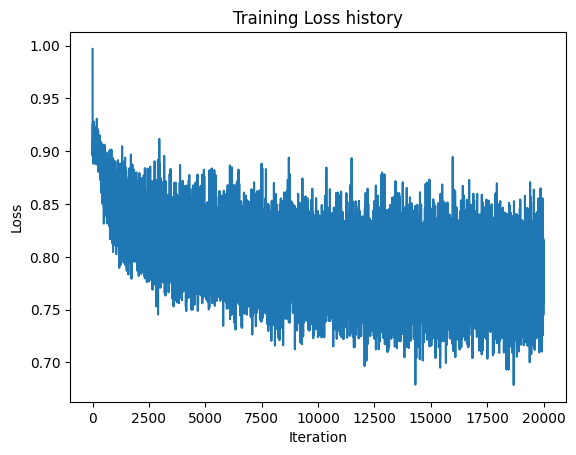

Training accuracy = 40.906
Test accuracy = 40.05


In [ ]:
Din = 3*32*32 #Input size (flattened image)
hidden_size = 100
K = 10
std = 1e-3

#Initialize weights and biases

w1 = torch.randn(Din, hidden_size, dtype=torch.float32)*std
b1 = torch.zeros(hidden_size)
w2 = torch.randn(hidden_size, K, dtype=torch.float32)*std
b2 = torch.zeros(K)

#Hyperparameters
iterations = 20
learning_rate = 1e-2
learning_rate_decay = 0.9
reg = 0
loss_history = []

# 3. Training
for t in range(iterations):
    running_loss = 0.0
    # Add tqdm progress bar
    with tqdm(enumerate(trainloader, 0), total=len(trainloader), desc=f"Epoch {t+1}/{iterations}") as pbar:
        for i, data in pbar:
            inputs, labels = data
            Ntr = inputs.shape[0]
            x_train = inputs.view(Ntr, -1)
            y_train_onehot = nn.functional.one_hot(labels, K).float()

            # Forward pass
            hidden = torch.sigmoid(x_train.mm(w1) + b1)
            y_pred = hidden.mm(w2)+ b2
            

            # Compute loss
            loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))

            loss_history.append(loss.item())
            running_loss += loss.item()

            # Backpropagation
            dy_pred = 2 / Ntr * (y_pred - y_train_onehot)
            dhidden = dy_pred.mm(w2.t()) * hidden * (1 - hidden)
            dw2 = hidden.t().mm(dy_pred) + reg * w2
            db2 = dy_pred.sum(dim=0)
            dw1 = x_train.t().mm(dhidden) + reg * w1
            db1 = dhidden.sum(dim=0)

            # Update weights

            w1 -= learning_rate * dw1
            b1 -= learning_rate * db1
            w2 -= learning_rate * dw2
            b2 -= learning_rate * db2

            # Update the progress bar description with the current loss
            pbar.set_postfix(loss=running_loss/(i+1))
    
    learning_rate *= learning_rate_decay
    # Print loss for every epoch
    print(f"Iteration {t}, average loss = {running_loss/len(trainloader)}")

##### The previous parameters, like the time delay and learning rate, didn’t yield good accuracy after adding another layer to the network. So, I adjusted these parameters and retrained the model, which resulted in a slight improvement in accuracy

## Part (b) and Part (c)

Epoch 1/10: 100%|██████████| 1000/1000 [00:11<00:00, 90.38it/s, loss=2.26]


Iteration 1, average loss = 2.2627836148738862


Epoch 2/10: 100%|██████████| 1000/1000 [00:12<00:00, 82.77it/s, loss=2.13]


Iteration 2, average loss = 2.128816370010376


Epoch 3/10: 100%|██████████| 1000/1000 [00:12<00:00, 78.64it/s, loss=2.04]


Iteration 3, average loss = 2.043873230218887


Epoch 4/10: 100%|██████████| 1000/1000 [00:12<00:00, 77.26it/s, loss=2]  


Iteration 4, average loss = 2.001458221077919


Epoch 5/10: 100%|██████████| 1000/1000 [00:14<00:00, 69.65it/s, loss=1.98]


Iteration 5, average loss = 1.9790847936868667


Epoch 6/10: 100%|██████████| 1000/1000 [00:13<00:00, 74.94it/s, loss=1.97]


Iteration 6, average loss = 1.966016365647316


Epoch 7/10: 100%|██████████| 1000/1000 [00:11<00:00, 85.19it/s, loss=1.96]


Iteration 7, average loss = 1.9551160387992859


Epoch 8/10: 100%|██████████| 1000/1000 [00:11<00:00, 90.19it/s, loss=1.95]


Iteration 8, average loss = 1.9473745476007462


Epoch 9/10: 100%|██████████| 1000/1000 [00:10<00:00, 91.18it/s, loss=1.94]


Iteration 9, average loss = 1.941304913043976


Epoch 10/10: 100%|██████████| 1000/1000 [00:10<00:00, 92.61it/s, loss=1.94]

Iteration 10, average loss = 1.9369519546031952


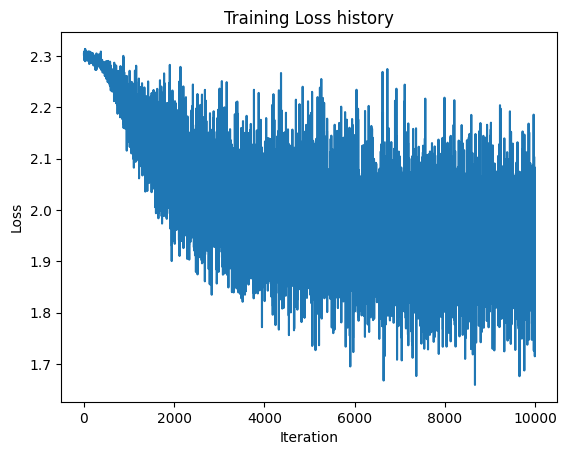

Training accuracy = 29.492
Test accuracy = 28.93


In [ ]:
Din = 3*32*32 #Input size (flattened image)
hidden_size = 100
K = 10
std = 1e-2

#Initialize weights and biases

w1 = torch.randn(Din, hidden_size, dtype=torch.float32)*std
b1 = torch.zeros(hidden_size)
w2 = torch.randn(hidden_size, K, dtype=torch.float32)*std
b2 = torch.zeros(K)

#Hyperparameters
iterations = 10
learning_rate = 1e-5
learning_rate_decay = 0.9
reg = 0
loss_history = []
# 3. Training
for t in range(iterations):
    running_loss = 0.0
    # Add tqdm progress bar
    with tqdm(enumerate(trainloader, 0), total=len(trainloader), desc=f"Epoch {t+1}/{iterations}") as pbar:
        for i, data in pbar:
            inputs, labels = data
            Ntr = inputs.shape[0]
            x_train = inputs.view(Ntr, -1)
            y_train_onehot = nn.functional.one_hot(labels, K).float()

            # Forward pass
            hidden = torch.sigmoid(x_train.mm(w1) + b1)
            y_pred = torch.softmax(hidden.mm(w2)+ b2,dim=1)
            

            # Clip predictions to avoid log(0) and ensure numerical stability
            epsilon = 1e-15
            y_pred= torch.clamp(y_pred, epsilon, 1 - epsilon)

            # Cross-entropy loss
            loss = -torch.mean(torch.sum(y_train_onehot * torch.log(y_pred), dim=1))
            running_loss += loss.item()
            loss_history.append(loss.item())

            # Backward pass
            dL_dY2 = - (y_train_onehot / y_pred- (1-y_train_onehot) / (1-y_pred))

            dw2 = hidden.T.mm(dL_dY2)
            db2 = torch.sum(dL_dY2, dim=0)

            dL_dY1 = dL_dY2.mm(w2.T) * hidden * (1 - hidden)

            dw1 = x_train.T.mm(dL_dY1)
            db1 = torch.sum(dL_dY1, dim=0)
            # Update weights
            
            w1 -= learning_rate * dw1
            b1 -= learning_rate * db1
            w2 -= learning_rate * dw2
            b2 -= learning_rate * db2

            # Update the progress bar description with the current loss
            pbar.set_postfix(loss=running_loss/(i+1))
    
    learning_rate *= learning_rate_decay
    # Print loss for every epoch
    print(f"Iteration {t+1}, average loss = {running_loss/len(trainloader)}")


### Loss Function

In this code, I use the **cross-entropy loss** function to evaluate model performance, which is standard for classification tasks. Cross-entropy loss compares the predicted probabilities (`y_pred`) against the true labels (converted to one-hot encoded format as `y_train_onehot`) and penalizes incorrect predictions.

The loss calculation formula goes like this:

$$
\text{Loss} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \log(p_{ij})
$$

where:
- \( N \) is the batch size,
- \( K \) is the number of classes,
- \( y_{ij} \) is the actual one-hot encoded label,
- \( p_{ij} \) is the predicted probability for each class.

To keep it stable, I use `torch.clamp` to avoid taking `log(0)`, which would cause errors.

### Backpropagation

With backpropagation, I calculate gradients for each weight and bias to reduce the loss. Here’s how I approach it:

1. **Gradient of Loss with Respect to Final Layer Output**: I calculate `dL_dY2`, the derivative of the loss with respect to the model’s output, using the difference between `y_train_onehot` and `y_pred`.

2. **Gradients for `w2` and `b2`**:
   - For `dw2`, I use the hidden layer activations and `dL_dY2`, taking the transpose of the activations and multiplying it by `dL_dY2`.
   - `db2` is just the sum of `dL_dY2` across the batch.

3. **Gradients for `w1` and `b1`**:
   - To backpropagate to the hidden layer, I compute `dL_dY1`, the gradient with respect to the hidden layer's output, and apply the derivative of the sigmoid activation.
   - `dw1` comes from multiplying the transpose of the input with `dL_dY1`, while `db1` is the batch sum of `dL_dY1`.

### Weight Update

Once the gradients are ready, I use **gradient descent** to update weights and biases with:

$$
w = w - \text{learning\_rate} \times \text{gradient}
$$
$$
b = b - \text{learning\_rate} \times \text{gradient}
$$

I start with a learning rate of `1e-5` and decay it a bit each iteration to allow for more precise steps as the model converges. Each weight and bias is adjusted to reduce the loss, and this process repeats over each iteration to improve model accuracy step-by-step.


Epoch 1/10: 100%|██████████| 1000/1000 [00:10<00:00, 98.98it/s, loss=2.21]


Iteration 1, average loss = 2.212504430890083


Epoch 2/10: 100%|██████████| 1000/1000 [00:12<00:00, 82.21it/s, loss=2.02]


Iteration 2, average loss = 2.016350830078125


Epoch 3/10: 100%|██████████| 1000/1000 [00:11<00:00, 83.46it/s, loss=1.93]


Iteration 3, average loss = 1.9302083488702775


Epoch 4/10: 100%|██████████| 1000/1000 [00:11<00:00, 87.03it/s, loss=1.88]


Iteration 4, average loss = 1.8835479860305786


Epoch 5/10: 100%|██████████| 1000/1000 [00:12<00:00, 80.37it/s, loss=1.85]


Iteration 5, average loss = 1.8470300312042236


Epoch 6/10: 100%|██████████| 1000/1000 [00:11<00:00, 84.91it/s, loss=1.82]


Iteration 6, average loss = 1.8166582612991333


Epoch 7/10: 100%|██████████| 1000/1000 [00:11<00:00, 88.49it/s, loss=1.79]


Iteration 7, average loss = 1.7921019866466523


Epoch 8/10: 100%|██████████| 1000/1000 [00:12<00:00, 77.08it/s, loss=1.77]


Iteration 8, average loss = 1.7711792846918106


Epoch 9/10: 100%|██████████| 1000/1000 [00:11<00:00, 85.63it/s, loss=1.75]


Iteration 9, average loss = 1.7530859388113023


Epoch 10/10: 100%|██████████| 1000/1000 [00:14<00:00, 71.02it/s, loss=1.74]

Iteration 10, average loss = 1.737348691701889


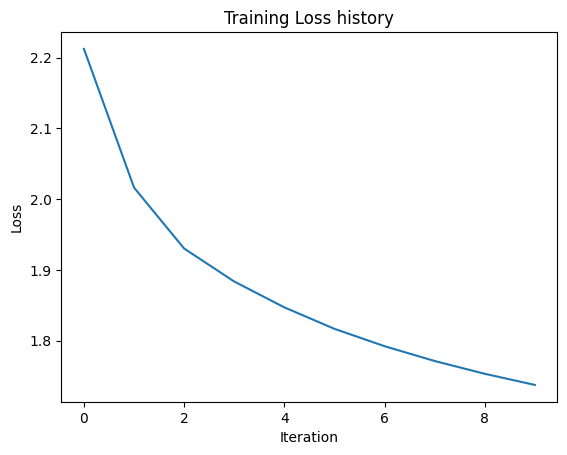

Training accuracy = 39.48
Test accuracy = 39.27


In [ ]:
# Initialize weights and biases as parameters
w1 = torch.nn.Parameter(torch.randn(Din, hidden_size) * std, requires_grad=True)
b1 = torch.nn.Parameter(torch.zeros(hidden_size), requires_grad=True)
w2 = torch.nn.Parameter(torch.randn(hidden_size, K) * std, requires_grad=True)
b2 = torch.nn.Parameter(torch.zeros(K), requires_grad=True)

# Hyperparameters
iterations = 10
learning_rate = 1e-2
learning_rate_decay = 0.9
loss_history = []

# Cross-entropy loss
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD([w1, b1, w2, b2], lr=learning_rate)

# 3. Training
for t in range(iterations):
    running_loss = 0.0
    # Add tqdm progress bar
    with tqdm(enumerate(trainloader, 0), total=len(trainloader), desc=f"Epoch {t+1}/{iterations}") as pbar:
        for i, data in pbar:
            inputs, labels = data
            Ntr = inputs.shape[0]
            x_train = inputs.view(Ntr, -1)

            # Forward pass
            hidden = torch.sigmoid(x_train.mm(w1) + b1)
            y_pred = hidden.mm(w2) + b2

            # Compute loss
            loss = criterion(y_pred, labels)
            running_loss += loss.item()

            # Zero gradients, perform backward pass, and update weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update the progress bar description with the current loss
            pbar.set_postfix(loss=running_loss / (i + 1))

    learning_rate *= learning_rate_decay
    # Print loss for every epoch
    print(f"Iteration {t+1}, average loss = {running_loss / len(trainloader)}")
    loss_history.append(running_loss / len(trainloader))

### Loss Function

In this code, I use PyTorch's **`CrossEntropyLoss`** function to compute the loss. This is a standard loss function for classification tasks, which internally combines both softmax and the negative log-likelihood for multi-class classification. The function compares the predicted logits (`y_pred`) against the true class labels (`labels`), and it automatically handles the computation of probabilities through softmax.


By using **`CrossEntropyLoss`**, I don't need to manually apply softmax and compute the log of the probabilities. PyTorch takes care of these operations efficiently, reducing the chances of errors and improving numerical stability.

### Backpropagation

For backpropagation, I rely on PyTorch's automatic differentiation engine. This engine computes the gradients of the loss with respect to all the model parameters, such as weights and biases, without needing to manually derive the equations.

Here's how backpropagation is handled in the code:

1. **Compute Loss**: The loss is computed using `CrossEntropyLoss` as discussed. Once the loss is calculated, I can call **`loss.backward()`** to compute the gradients of the loss with respect to each parameter in the model.

2. **Gradient Calculation**: 
   - **`loss.backward()`** computes the gradients for all the parameters (`w1`, `b1`, `w2`, `b2`) involved in the computation. 
   - PyTorch automatically calculates the gradients through backpropagation, propagating the error from the output layer all the way back to the input layer.

### Weight Update

After calculating the gradients, I use the **Stochastic Gradient Descent (SGD)** optimizer to update the model's parameters. The optimizer applies the following update rule:

$$
w = w - \text{learning\_rate} \times \frac{\partial \text{Loss}}{\partial w}
$$
$$
b = b - \text{learning\_rate} \times \frac{\partial \text{Loss}}{\partial b}
$$

Where:
- \( w \) and \( b \) represent the weights and biases,
- The gradients are computed by the **`backward()`** pass.

To avoid accumulating gradients from previous iterations, I call **`optimizer.zero_grad()`** before the backpropagation step.

```python
optimizer.zero_grad()   # Zero the gradients
loss.backward()         # Backpropagate the loss to compute gradients
optimizer.step()        # Update the parameters using the gradients


# Question 2

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 10

# Define LeNet-5 model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.pool = nn.AvgPool2d(2, stride=2)

    def forward(self, x):
        x = self.pool(self.tanh(self.conv1(x)))
        x = self.pool(self.tanh(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.tanh(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Training and test configurations
batch_size = 64
learning_rate = 0.001
epochs = 10

# Data loading and transformations
transform = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [8]:

# Lists to store train and test accuracies
train_accuracies = []
test_accuracies = []

# Training the model with a progress bar
for epoch in range(epochs):
    model.train()
    train_loss = 0
    correct = 0
    with tqdm(total=len(train_loader), desc=f"Epoch {epoch + 1}/{epochs}", unit="batch") as pbar:
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            pbar.update(1)

    train_loss /= len(train_loader.dataset)
    train_accuracy = 100. * correct / len(train_loader.dataset)
    train_accuracies.append(train_accuracy)
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    # Evaluate on the test set
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            test_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    test_accuracies.append(test_accuracy)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


Epoch 1/10: 100%|██████████| 938/938 [00:18<00:00, 51.96batch/s]


Train Loss: 0.3017, Train Accuracy: 90.91%
Test Loss: 0.1180, Test Accuracy: 96.41%


Epoch 2/10: 100%|██████████| 938/938 [00:18<00:00, 51.60batch/s]


Train Loss: 0.0953, Train Accuracy: 97.07%
Test Loss: 0.0760, Test Accuracy: 97.44%


Epoch 3/10: 100%|██████████| 938/938 [00:18<00:00, 49.89batch/s]


Train Loss: 0.0666, Train Accuracy: 97.89%
Test Loss: 0.0597, Test Accuracy: 98.17%


Epoch 4/10: 100%|██████████| 938/938 [00:19<00:00, 46.97batch/s]


Train Loss: 0.0504, Train Accuracy: 98.42%
Test Loss: 0.0605, Test Accuracy: 98.10%


Epoch 5/10: 100%|██████████| 938/938 [00:21<00:00, 44.48batch/s]


Train Loss: 0.0402, Train Accuracy: 98.69%
Test Loss: 0.0544, Test Accuracy: 98.31%


Epoch 6/10: 100%|██████████| 938/938 [00:20<00:00, 45.92batch/s]


Train Loss: 0.0332, Train Accuracy: 98.93%
Test Loss: 0.0505, Test Accuracy: 98.36%


Epoch 7/10: 100%|██████████| 938/938 [00:20<00:00, 45.20batch/s]


Train Loss: 0.0284, Train Accuracy: 99.05%
Test Loss: 0.0524, Test Accuracy: 98.37%


Epoch 8/10: 100%|██████████| 938/938 [00:21<00:00, 43.62batch/s]


Train Loss: 0.0220, Train Accuracy: 99.30%
Test Loss: 0.0491, Test Accuracy: 98.52%


Epoch 9/10: 100%|██████████| 938/938 [00:20<00:00, 44.96batch/s]


Train Loss: 0.0211, Train Accuracy: 99.33%
Test Loss: 0.0480, Test Accuracy: 98.57%


Epoch 10/10: 100%|██████████| 938/938 [00:21<00:00, 43.23batch/s]


Train Loss: 0.0170, Train Accuracy: 99.44%
Test Loss: 0.0456, Test Accuracy: 98.71%


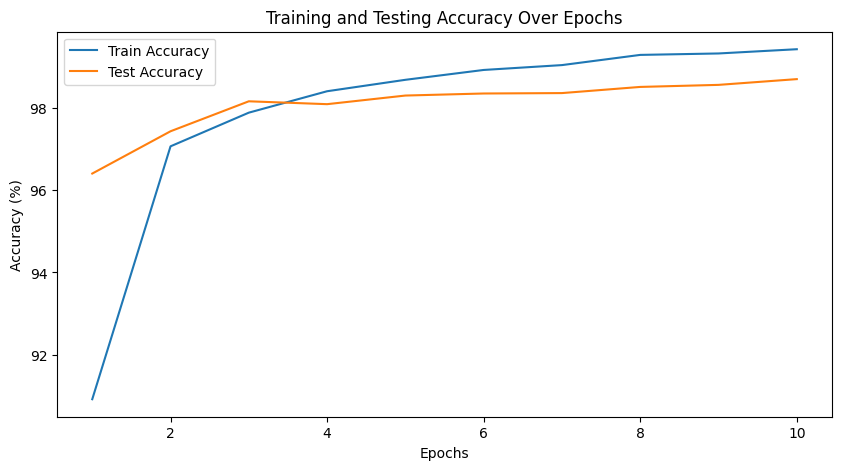

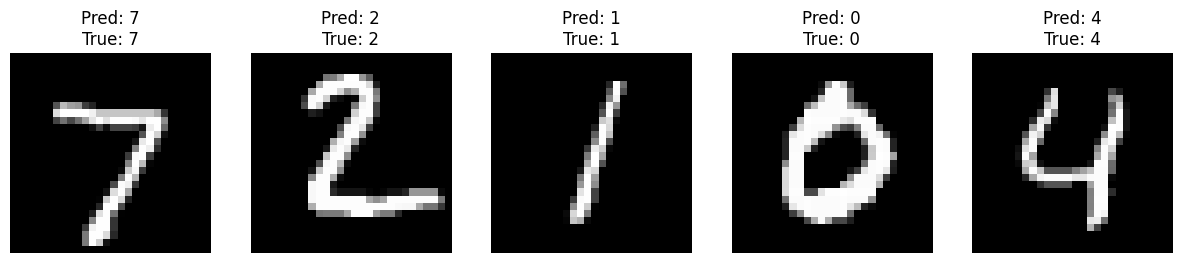

In [9]:
# Plotting train and test accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy Over Epochs')
plt.legend()
plt.show()

# Plotting a few test results
def plot_results(model, test_loader):
    model.eval()
    images, labels = next(iter(test_loader))
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"Pred: {preds[i].item()}\nTrue: {labels[i].item()}")
        ax.axis('off')
    plt.show()

plot_results(model, test_loader)

### LeNet-5 Model Architecture

The code implements the **LeNet-5** architecture, a classic convolutional neural network originally designed for digit recognition tasks. Below is a summary of the model's structure, training setup, and loss function.

#### 1. Model Architecture

- **Conv1**: 
  - Convolutional layer with 6 filters, each of size 5x5, stride of 1, and padding of 2.
- **Conv2**: 
  - Second convolutional layer with 16 filters of size 5x5 and stride of 1.
- **Pooling**:
  - Average Pooling (2x2) applied after each convolutional layer with a stride of 2, reducing spatial dimensions.
- **Fully Connected Layers**:
  - `fc1`: A linear layer with 16 * 5 * 5 input units connected to 120 output units.
  - `fc2`: A linear layer with 120 input units connected to 84 output units.
  - `fc3`: A final layer with 84 input units connected to 10 output units (one for each MNIST digit class).
- **Activation Functions**:
  - **Tanh** is applied after the first convolutional and first fully connected layers.
  - **ReLU** is applied after the second fully connected layer.

#### 2. Training Configuration

- **Dataset**: MNIST (28x28 grayscale images of handwritten digits).
- **Optimizer**: Adam optimizer, which adapts the learning rate during training for improved convergence.

#### 3. Loss Function: Cross-Entropy Loss

The model uses **Cross-Entropy Loss** as the loss function, which is commonly used in multi-class classification tasks. Cross-Entropy Loss calculates the difference between the predicted probability distribution of classes and the true distribution, encouraging the model to increase the probability for the correct class and decrease it for others. Mathematically, it’s defined as:

$$
\text{Loss} = - \sum_{i=1}^{n} y_i \log(p_i)
$$

where:
- \( y_i \) is the true label (1 for the correct class, 0 for others),
- \( p_i \) is the predicted probability for each class.

In this setup, Cross-Entropy Loss allows the model to learn how to minimize classification errors during training and is well-suited for distinguishing the ten classes in the MNIST dataset.

#### 4. Data Loading & Transformations

- **Transformations**: 
  - Resizing images to 28x28 pixels.
  - Converting images to tensors.

This LeNet-5 model is effective for classification tasks like MNIST and serves as a foundational CNN architecture in deep learning.


# Question 3


In [1]:
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

In [2]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/kaggle/input/hypomen/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

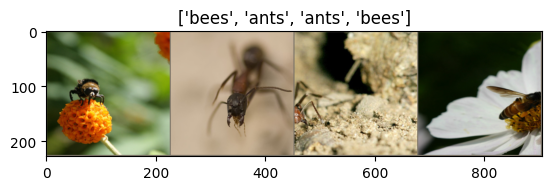

In [3]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

## Part (a) - Fine tuning

In [4]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))
    return model

In [5]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [6]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 177MB/s] 


In [7]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5991 Acc: 0.6885
val Loss: 0.2550 Acc: 0.9085

Epoch 1/24
----------
train Loss: 0.4831 Acc: 0.7828
val Loss: 0.3147 Acc: 0.8693

Epoch 2/24
----------
train Loss: 0.4698 Acc: 0.8279
val Loss: 0.1793 Acc: 0.9477

Epoch 3/24
----------
train Loss: 0.4831 Acc: 0.8033
val Loss: 0.2908 Acc: 0.8954

Epoch 4/24
----------
train Loss: 0.5137 Acc: 0.7951
val Loss: 0.2804 Acc: 0.9020

Epoch 5/24
----------
train Loss: 0.3887 Acc: 0.8525
val Loss: 0.3349 Acc: 0.8824

Epoch 6/24
----------
train Loss: 0.6237 Acc: 0.7623
val Loss: 0.2364 Acc: 0.9216

Epoch 7/24
----------
train Loss: 0.3170 Acc: 0.8852
val Loss: 0.2019 Acc: 0.9150

Epoch 8/24
----------
train Loss: 0.3241 Acc: 0.8689
val Loss: 0.2007 Acc: 0.9085

Epoch 9/24
----------
train Loss: 0.3089 Acc: 0.8730
val Loss: 0.1703 Acc: 0.9346

Epoch 10/24
----------
train Loss: 0.2269 Acc: 0.9180
val Loss: 0.1739 Acc: 0.9281

Epoch 11/24
----------
train Loss: 0.2847 Acc: 0.8648
val Loss: 0.1789 Acc: 0.9216

Ep

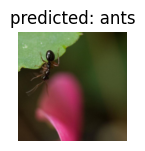

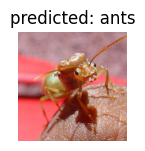

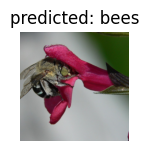

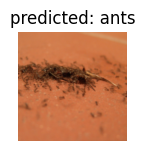

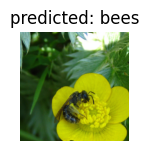

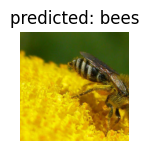

In [8]:
visualize_model(model_ft)

## Part (b) Using the network as a feature extracter

In [10]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6065 Acc: 0.6926
val Loss: 0.2100 Acc: 0.9216

Epoch 1/24
----------
train Loss: 0.5543 Acc: 0.7295
val Loss: 0.3224 Acc: 0.8627

Epoch 2/24
----------
train Loss: 0.4874 Acc: 0.7459
val Loss: 0.2295 Acc: 0.9150

Epoch 3/24
----------
train Loss: 0.5847 Acc: 0.7377
val Loss: 0.4472 Acc: 0.8366

Epoch 4/24
----------
train Loss: 0.5403 Acc: 0.7664
val Loss: 0.2182 Acc: 0.9150

Epoch 5/24
----------
train Loss: 0.4706 Acc: 0.7705
val Loss: 0.2581 Acc: 0.9020

Epoch 6/24
----------
train Loss: 0.3391 Acc: 0.8566
val Loss: 0.1948 Acc: 0.9346

Epoch 7/24
----------
train Loss: 0.3963 Acc: 0.8156
val Loss: 0.2665 Acc: 0.9085

Epoch 8/24
----------
train Loss: 0.3638 Acc: 0.8443
val Loss: 0.2418 Acc: 0.9216

Epoch 9/24
----------
train Loss: 0.3361 Acc: 0.8689
val Loss: 0.1895 Acc: 0.9412

Epoch 10/24
----------
train Loss: 0.3583 Acc: 0.8566
val Loss: 0.2056 Acc: 0.9477

Epoch 11/24
----------
train Loss: 0.3161 Acc: 0.8320
val Loss: 0.1960 Acc: 0.9477

Ep

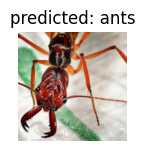

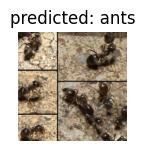

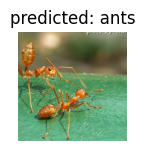

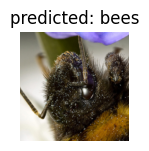

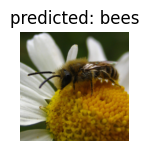

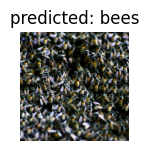

In [11]:
visualize_model(model_conv)

plt.ioff()
plt.show()

In [12]:
def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

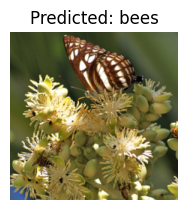

In [13]:
visualize_model_predictions(
    model_conv,
    img_path='/kaggle/input/hypomen/hymenoptera_data/val/bees/72100438_73de9f17af.jpg'
)

plt.ioff()
plt.show()

In [47]:
def visualize_model_predictions(model, img_paths):
    was_training = model.training
    model.eval()

    if model == model_conv:
        model_name = "Feature extractor"
    else:
        model_name = 'Fine tuned model'

    # Set up the figure to display 5 images in a row
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # 5 images in a row

    for i, img_path in enumerate(img_paths):
        # Load and transform the image
        img = Image.open(img_path)
        img = data_transforms['val'](img).unsqueeze(0).to(device)

        with torch.no_grad():
            # Get model predictions
            outputs = model(img)
            _, preds = torch.max(outputs, 1)

            # Reverse normalization for displaying the image
            img_display = img.cpu().squeeze().permute(1, 2, 0)
            img_display = img_display * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
            img_display = torch.clip(img_display, 0, 1)

            # Plot each image
            ax = axes[i]
            ax.axis('off')
            ax.set_title(f'Predicted: {class_names[preds[0]]}')

            # Display the image
            ax.imshow(img_display)

    # Set the title for the whole figure (model name)
    plt.suptitle(f'Predictions by Model: {model_name}', fontsize=16)
    plt.show()

    # Reset model to original mode
    model.train(mode=was_training)

In [48]:
img_paths = [
    '/kaggle/input/hypomen/hymenoptera_data/val/ants/10308379_1b6c72e180.jpg',
    '/kaggle/input/hypomen/hymenoptera_data/val/bees/1486120850_490388f84b.jpg',
    '/kaggle/input/hypomen/hymenoptera_data/val/bees/151594775_ee7dc17b60.jpg',
    '/kaggle/input/hypomen/hymenoptera_data/val/ants/209615353_eeb38ba204.jpg',
    '/kaggle/input/hypomen/hymenoptera_data/val/ants/1743840368_b5ccda82b7.jpg'
]



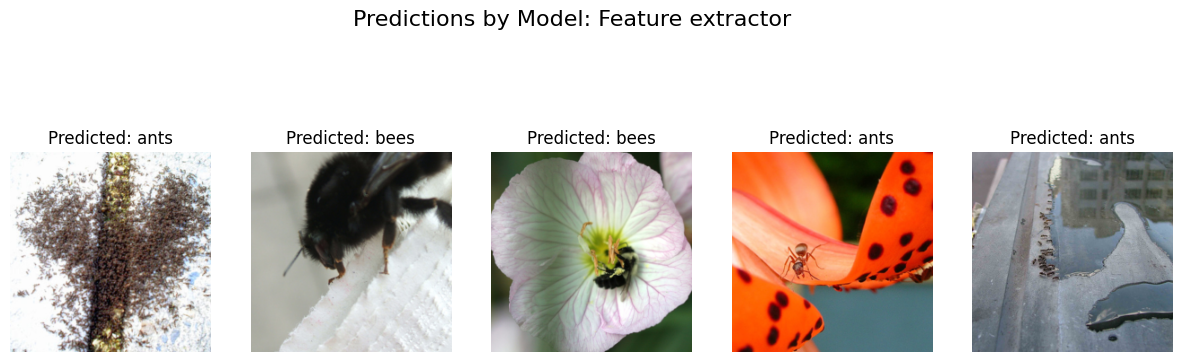

In [49]:
visualize_model_predictions(model_conv,img_paths)

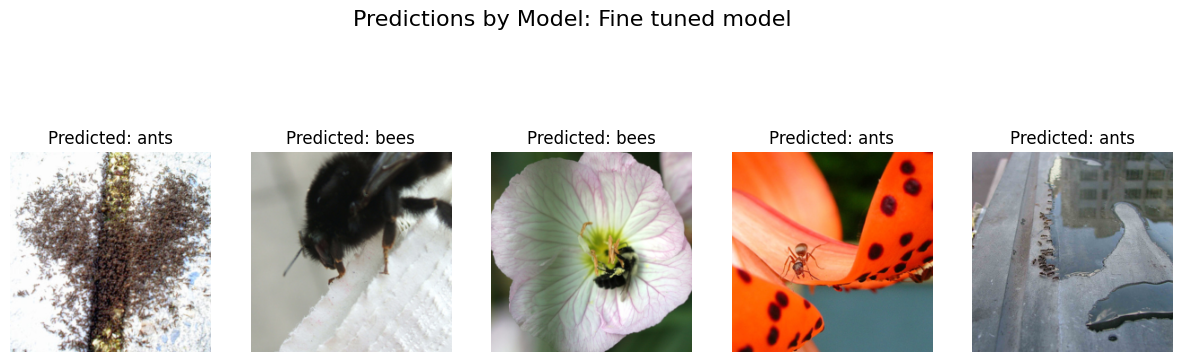

In [50]:
visualize_model_predictions(model_ft,img_paths)

##### For the Hymenoptera dataset, both major transfer learning approaches—fine-tuning the ConvNet and using it as a fixed feature extractor—demonstrate good accuracy. In fine-tuning, the model begins with a pretrained network, such as one trained on ImageNet, and adjusts all layers during training. This can lead to slightly improved performance by tailoring the entire network to specific details within the dataset. On the other hand, using the ConvNet as a fixed feature extractor involves freezing all layers except the last fully connected layer, which is replaced and trained with new random weights. This approach leverages the strong, pretrained features efficiently, achieving high accuracy with less computational demand, making it ideal for cases where high performance on similar image classification tasks is required without extensive retraining.